
# Diseño de software
----

## Mutation Testing

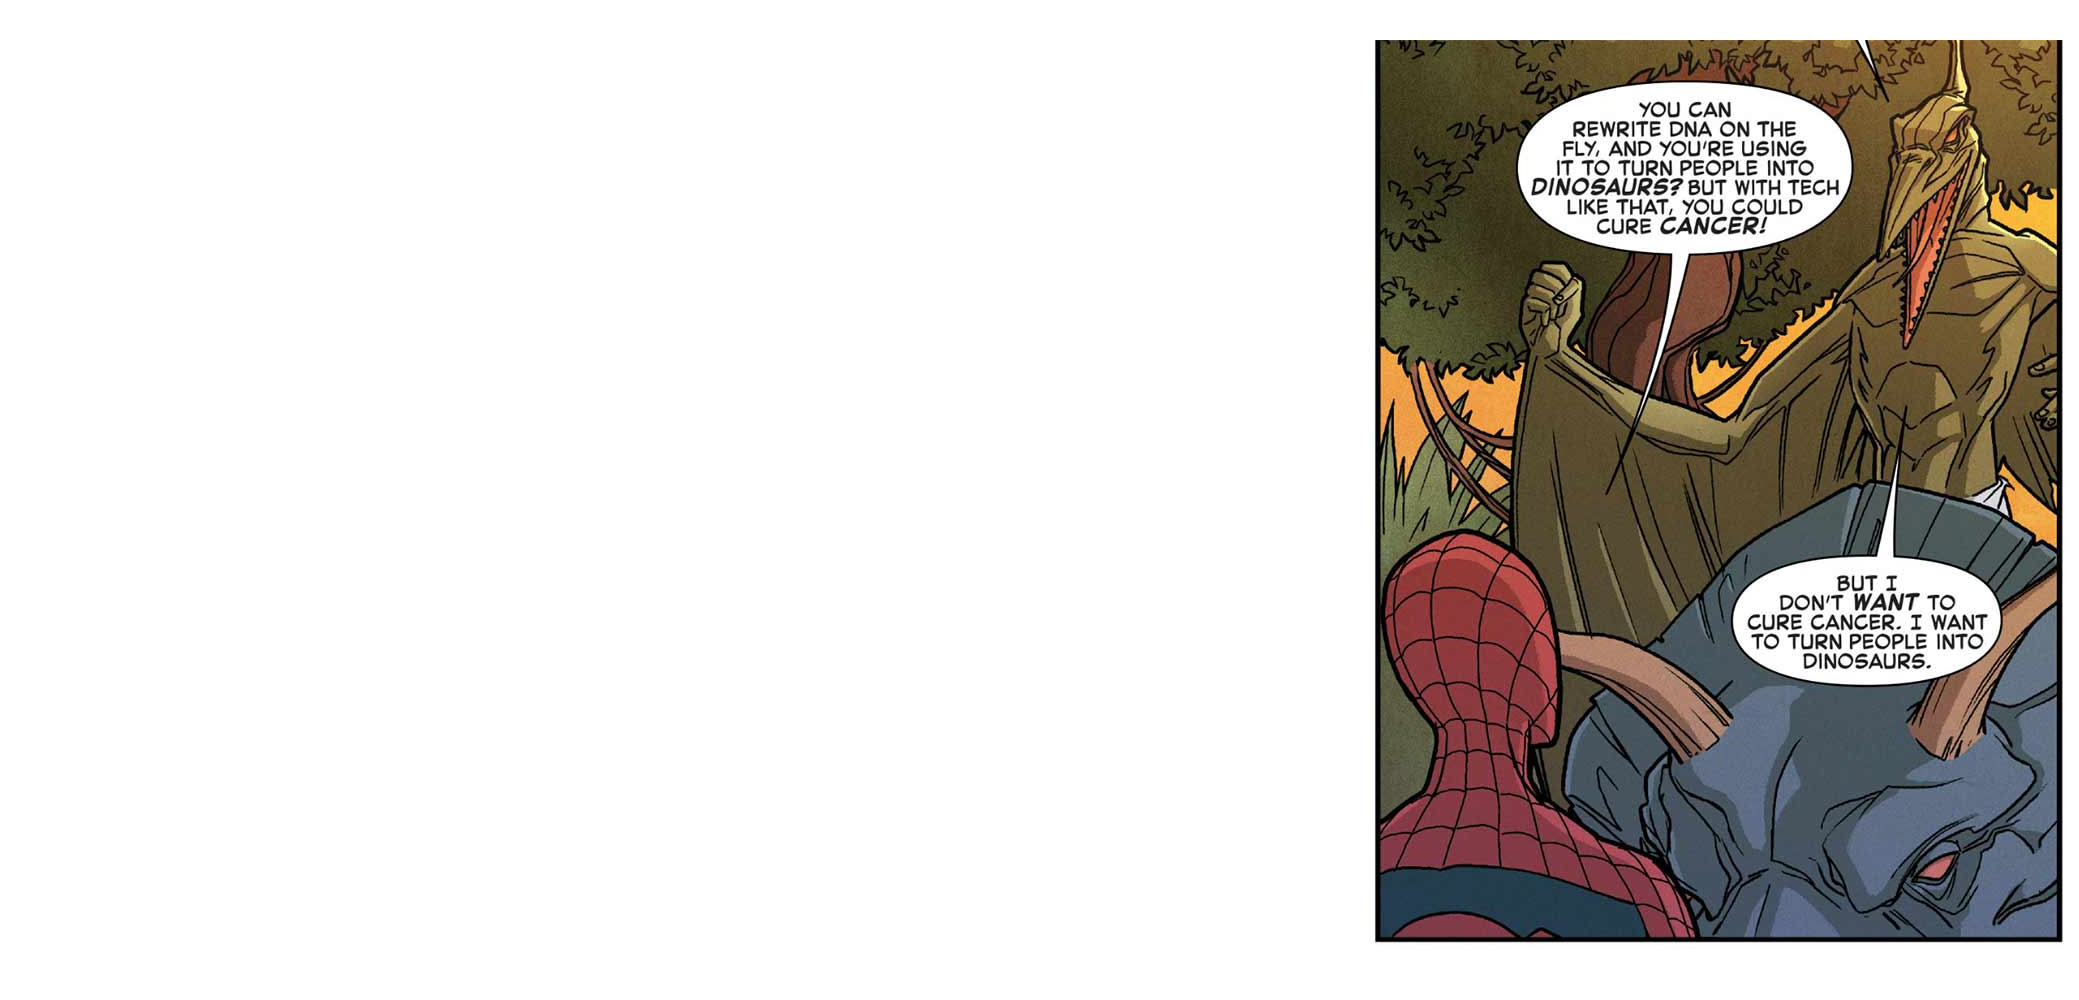

## Preambulo

Papers seminales:

> Richard A. DeMillo, Richard J. Lipton, and Fred G. Sayward. Hints on test data selection: Help for the practicing programmer. IEEE Computer, 11(4):34-41. April 1978.  <<<< ESTA EN FORTRAN!

> Budd, T. A. (1980). Mutation analysis of program test data. Yale University. <<<< Esto es una tesis.


#### Fuentes: 

- https://www.youtube.com/watch?v=jwB3Nn4hR1o  (explica mejor)
- https://www.youtube.com/watch?v=yI8Yje1XDkk  (este es el auto de mutmut)

#### Estado del arte

PIT para Java: https://pitest.org/ 

## Definición de Mutation Testing

Mutation testing es una técnica de prueba de software que:

- Evalúa la calidad de las pruebas existentes
- Introduce cambios (mutaciones) en el código fuente
- Verifica si las pruebas detectan estos cambios

> "Si tus pruebas no pueden detectar un error simple, ¿qué tan buenas son realmente?"

## Qué es el mutation testing?

- Tenemos nuestro proyecto + los tests.
- Introducimos **un** solo cambio al proyecto.
- Corremos nuevamente los tests.
- Idealmente cualquier cambio llevara a la falla en los tests.

```python
for operator in mutation_operators:
    for site in operator.find_sites(code):
        operator.mutate(site)
        run_tests
```

## Ejemplos de Mutaciones

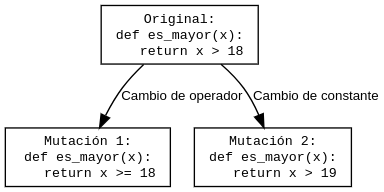


## Que nos responde un test de mutación?

- **Killed:** El test detecto la mutación.
- **Incompetent:** La mutación produjo codigo que es inherentemente incorrecto.
- **Survived:**
    - Los tests fallaron en detectar el cambio.
    - **O** los test son inadecuado para esa fracción de código.
    - Codigo mutado es equivalente.
    
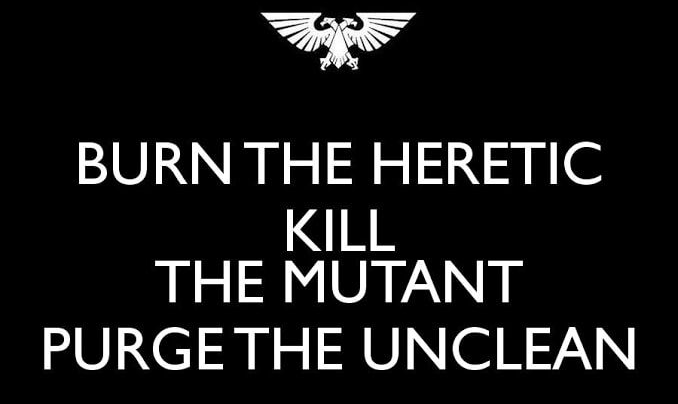

# Objetivo de Mutation Testing

1. **Coverage analysis:** Mis tests cubren significativamente mi código
2. Diferenciar el concepto de linea ejecutada vs funcionalidad verificada.

Es buena idea partir del 100% de code-coverage


## Mutations examples:
    
- Remplaazar un operador relacional: `x > 1` -> `x >= 1`
- Reemplazar `break` por `continue`
- Reemplazar una condición logica (`and` -> `or`)
- Cambiar una constante.
- Modificar un string.
- Borrar un decorador.

## Complejidad 1: La velocidad

- Esto es lento!... MUY LENTO
- Hay que tratar de que todo vaya en parelelo.
- Luego de una primer corrida de baseline: 
    - Solo correr los mutantes que fallaron.
    - Solo mutar codigo modificado.
- Acelerar los tests.
- Frenar los test al primer fallo.

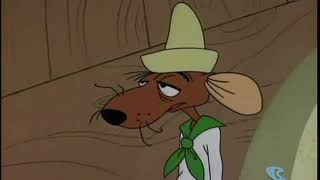

## Complejidad 2: Detección de incompetencia

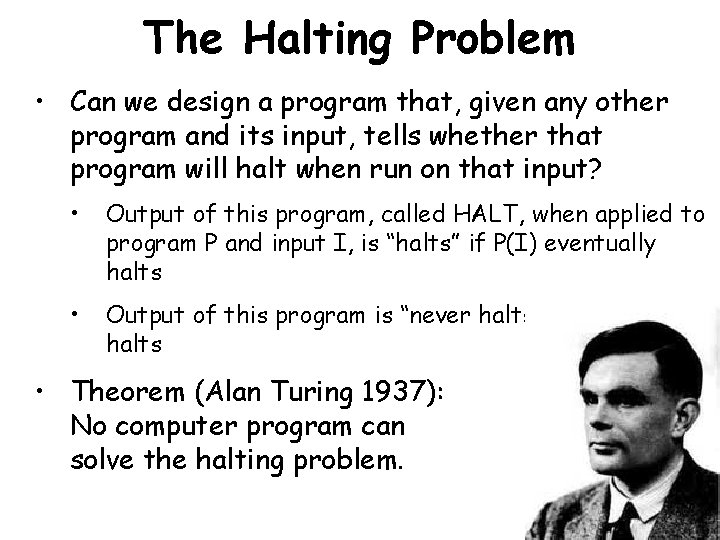

## Complejidad 3: Mutantes equivalentes

In [ ]:
esta_50 = False
for e in range(500):
    if e == 50:
        esta_50 = True
        break

assert esta_50

In [ ]:
esta_50 = False
for e in range(500):
    if e == 50:
        esta_50 = True
        continue  # Mutación

assert esta_50

## Métricas de Mutation Testing

1. **Mutation Score** - $MS = (D / (T - E)) * 100$
   
   Donde:
     
     - D = Número de mutantes detectados
     - T = Número total de mutantes
     - E = Número de mutantes equivalentes
       
   Porcentaje de mutantes no equivalentes detectados por las pruebas  
   Indica qué tan bien las pruebas detectan los mutantes.

2. **Mutation Coverage** - $MC = (M / LOC) * 100$
   
   Donde:
   
     - M = Número de mutaciones generadas
     - LOC = Líneas de código
   
   Porcentaje de código sometido a mutaciones

3. **Equivalent Mutant Ratio** - $EMR = (E / T) * 100$

   Porcentaje de mutantes que son funcionalmente equivalentes al código original  
   Es la proporción de mutantes que no aportan valor al testing.
     

4. **Mutation Operator Effectiveness** - $MOE = (Dm / Tm) * 100$

   Donde:

     - Dm = Número de mutantes detectados para un operador específico
     - Tm = Número total de mutantes generados por ese operador
   
   Efectividad de un operador de mutación específico  
   Qué tipos de mutaciones son más útiles.

## Métricas de Mutation Testing

5. **Test Suite Minimization** - $TSM = (Rts / Ots) * 100$

   Donde:

   
     - Rts = Número de pruebas en la suite reducida
     - Ots = Número de pruebas en la suite original
     - 
   Porcentaje de reducción en el tamaño de la suite de pruebas manteniendo el mismo mutation score

6. **Mutant Execution Time (MET)**
   Tiempo promedio para ejecutar todas las pruebas contra un mutante  
   Eficiencia del proceso de mutation testing

7. **Survived Mutant Ratio** - $SMR = (S / (T - E)) * 100$
   Donde:

      - S = Número de mutantes que sobrevivieron
     
   Porcentaje de mutantes no equivalentes que no fueron detectados por las pruebas

8. **Test Effectiveness Ratio (TER)** - $TER = (Dt / Tt) * 100$

    Donde:

     - Dt = Número de pruebas que detectaron al menos un mutante
     - Tt = Número total de pruebas
   
   Porcentaje de pruebas que son efectivas para detectar mutantes

## Cosmic Ray: mutation testing for Python

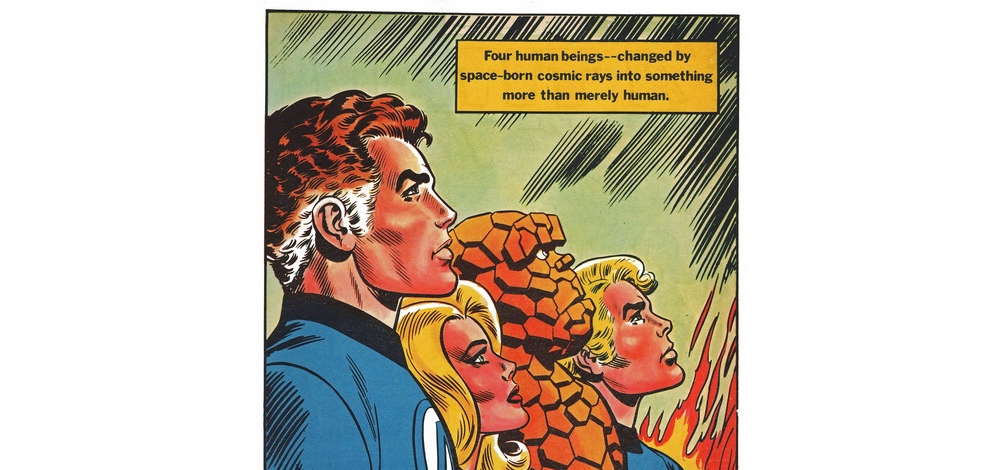

> Cosmic Ray is a mutation testing tool for Python 3. It makes small changes to your production source code, running your test suite for each change. If a test suite passes on mutated code, then you have a mismatch between your tests and your functionality.

```bash
$ pip install cosmic-ray
```
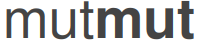

## Cosmic-Ray Simple tutorial

1. Creamos la configuración nueva con:

    ```bash
    $ cosmic-ray new-config tutorial.toml
    ```
    
    Va a hacer una serie de preguntas respecto a como correr los tests, y va crear un archivo `.toml` parecido a:
    
    ```toml
    [cosmic-ray]
    module-path = "funclibs.py"
    timeout = 50.0  
    excluded-modules = []
    test-command = "pytest test_funclibs.py"
    
    [cosmic-ray.distributor]
    name = "local"
    ```

2. Creamos la db con las mutaciones `cosmic-ray init cray.toml cray.sqlite`
3. Verificamos que los tests sin mutaciones paran `cosmic-ray --verbosity=INFO baseline cray.toml`
4. Podemos ver los trabajos pendientes `cr-report cray.sqlite --show-pending`
5. Ejecutamos los tests sobre las mutaciones: `cosmic-ray --verbosity=INFO exec cray.toml cray.sqlite`

### Reportes

6. Reportes: `cr-html cray.sqlite > report.html` o `cr-report cray.sqlite`
7. Podemos ver la única métrica disponible el survival rate `cr-rate cray.sqlite`
